In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/match_data.csv')
df.head()

,Date,Team1,Team2,Score,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,28/03/2024,spirit,faze,0,4,79.2,1,72.4,1.03,0.63,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,28/03/2024,spirit,natus_vincere,1,4,79.2,2,77.3,1.03,0.63,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,28/03/2024,spirit,imperial,1,4,79.2,18,72.0,1.03,0.63,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,28/03/2024,spirit,cloud9,1,4,79.2,7,63.0,1.03,0.63,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,28/03/2024,spirit,metizport,1,4,79.2,30,62.0,1.03,0.63,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [3]:
X = df.drop(columns=['Date', 'Team1', 'Team2', 'Score'])
X.head()

,Team1_Position,Team1_Win_Percentage,Team2_Position,Team2_Win_Percentage,Team1_Player1_Rating,Team1_Player1_Kills_Per_Round,Team1_Player1_Deaths_Per_Round,Team1_Player1_Headshots,Team1_Player2_Rating,Team1_Player2_Kills_Per_Round,...,Team2_Player3_Deaths_Per_Round,Team2_Player3_Headshots,Team2_Player4_Rating,Team2_Player4_Kills_Per_Round,Team2_Player4_Deaths_Per_Round,Team2_Player4_Headshots,Team2_Player5_Rating,Team2_Player5_Kills_Per_Round,Team2_Player5_Deaths_Per_Round,Team2_Player5_Headshots
0,4,79.2,1,72.4,1.03,0.63,0.64,56.1,1.21,0.74,...,0.63,54.0,1.12,0.71,0.60,52.5,1.18,0.74,0.59,35.1
1,4,79.2,2,77.3,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,65.9,1.16,0.73,0.65,51.2,1.17,0.74,0.57,38.4
2,4,79.2,18,72.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.64,48.6,1.14,0.73,0.61,52.2,1.11,0.69,0.66,53.5
3,4,79.2,7,63.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.65,35.8,1.09,0.65,0.67,48.0,1.12,0.68,0.57,45.9
4,4,79.2,30,62.0,1.03,0.63,0.64,56.1,1.21,0.74,...,0.66,55.2,1.10,0.68,0.68,55.5,1.09,0.66,0.66,52.3


In [4]:
y = df['Score']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
best_params = {
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.0,
    'reg_lambda': 0.1,
    'scale_pos_weight': 1.0
}

PERFORMANCE OF THE MODEL USING THE OPTIMAL PARAMETERS

In [8]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=10000, **best_params)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Average ROC-AUC: ", scores.mean())

Average ROC-AUC:  0.5993454450097462


In [9]:
X_columns = df.drop(['Date', 'Team1', 'Team2', 'Score'], axis=1).columns

In [10]:
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_columns)
importances = importances.sort_values(ascending=False)
print(importances)

Team1_Position                    0.043552
Team2_Position                    0.036991
Team2_Win_Percentage              0.033813
Team1_Player5_Deaths_Per_Round    0.032652
Team1_Player4_Kills_Per_Round     0.029454
Team1_Win_Percentage              0.029400
Team2_Player5_Headshots           0.028547
Team1_Player3_Rating              0.028332
Team1_Player2_Deaths_Per_Round    0.028141
Team2_Player2_Deaths_Per_Round    0.027515
Team1_Player2_Rating              0.026883
Team1_Player5_Kills_Per_Round     0.026850
Team2_Player1_Deaths_Per_Round    0.025097
Team2_Player4_Rating              0.024688
Team2_Player2_Headshots           0.024268
Team1_Player5_Rating              0.024105
Team2_Player2_Kills_Per_Round     0.023932
Team1_Player3_Deaths_Per_Round    0.023914
Team2_Player5_Kills_Per_Round     0.023885
Team1_Player2_Headshots           0.022377
Team1_Player1_Rating              0.022348
Team1_Player4_Rating              0.022209
Team2_Player4_Kills_Per_Round     0.021956
Team2_Playe

In [11]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [12]:
print(classification_report(y_test, y_pred))
confusion_m = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(confusion_m, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

print({
    'true negatives': f'{round(100*confusion_m[0, 0]/len(y_test))}%',
    'false positives': f'{round(100*confusion_m[0, 1]/len(y_test))}%',
    'false negatives': f'{round(100*confusion_m[1, 0]/len(y_test))}%',
    'true positives': f'{round(100*confusion_m[1, 1]/len(y_test))}%'
})

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       520
           1       0.55      0.59      0.57       502

    accuracy                           0.56      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.56      0.56      0.56      1022

                 Predicted Negative  Predicted Positive
Actual Negative                 274                 246
Actual Positive                 205                 297
{'true negatives': '27%', 'false positives': '24%', 'false negatives': '20%', 'true positives': '29%'}


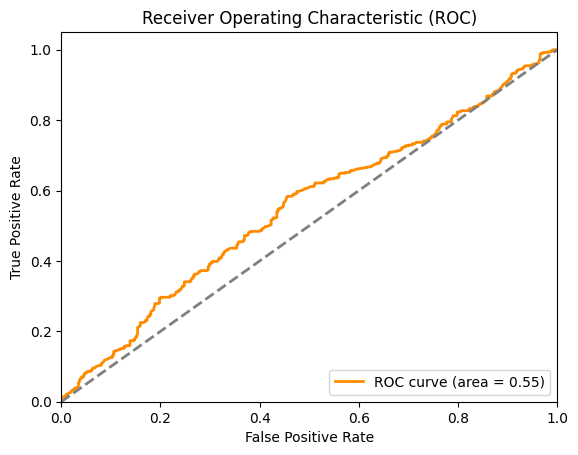

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

PERFORMANCE OF THE MODEL WITHOUT THE OPTIMAL PARAMETERS FOUND

In [14]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=10000)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print("Average ROC-AUC: ", scores.mean())

Average ROC-AUC:  0.5995876235388842


In [15]:
X_columns = df.drop(['Date', 'Team1', 'Team2', 'Score'], axis=1).columns

In [16]:
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_columns)
importances = importances.sort_values(ascending=False)
print(importances)

Team1_Position                    0.044786
Team2_Position                    0.037263
Team1_Player2_Kills_Per_Round     0.035212
Team1_Player5_Deaths_Per_Round    0.029955
Team2_Player1_Deaths_Per_Round    0.029735
Team1_Player2_Deaths_Per_Round    0.028845
Team1_Player4_Rating              0.027070
Team1_Player2_Rating              0.025448
Team2_Win_Percentage              0.025102
Team1_Player3_Rating              0.024967
Team2_Player3_Kills_Per_Round     0.024909
Team2_Player5_Headshots           0.024850
Team1_Player5_Kills_Per_Round     0.024608
Team2_Player4_Kills_Per_Round     0.023747
Team2_Player3_Headshots           0.023720
Team1_Win_Percentage              0.023605
Team2_Player2_Deaths_Per_Round    0.023577
Team2_Player3_Rating              0.023314
Team1_Player3_Deaths_Per_Round    0.022825
Team1_Player1_Headshots           0.022743
Team1_Player4_Kills_Per_Round     0.022725
Team1_Player1_Kills_Per_Round     0.022456
Team2_Player4_Rating              0.021997
Team1_Playe

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [18]:
print(classification_report(y_test, y_pred))
confusion_m = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(confusion_m, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

print({
    'true negatives': round(100*confusion_m[0, 0]/len(y_test)),
    'false positives': round(100*confusion_m[0, 1]/len(y_test)),
    'false negatives': round(100*confusion_m[1, 0]/len(y_test)),
    'true positives': round(100*confusion_m[1, 1]/len(y_test))
})

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       520
           1       0.54      0.59      0.56       502

    accuracy                           0.55      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.55      0.55      0.55      1022

                 Predicted Negative  Predicted Positive
Actual Negative                 272                 248
Actual Positive                 208                 294
{'true negatives': 27, 'false positives': 24, 'false negatives': 20, 'true positives': 29}


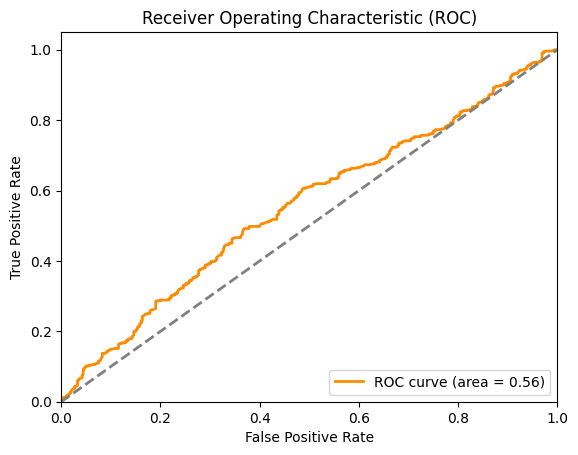

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()